# Part IA Computing: Michaelmas Term
## Exercises 08.1, 08.2, 08.3 and 08.4

Edwin Bahrami Balani ([`eb677`](mailto:eb677@cam.ac.uk))

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

try:
    import quandl
except ImportError:
    import sys
    if 'conda' in sys.version:  # Install using conda if we're using Anaconda Python
        !conda install -yc conda-forge quandl
    else:  # Install using pip on others systems
        try:
            !{sys.executable} -m pip -q install quandl  # Try to install globally
            import quandl
        except ImportError:
            !{sys.executable} -m pip -q install --user quandl  # Install in user space

try:
    import ipywidgets
except ImportError:
    try:
        !{sys.executable} -m pip -q install ipywidgets
        import ipywidgets
    except ImportError:
        !{sys.executable} -m pip -q --user install ipywidgets
    finally:
        !jupyter nbextension enable --py widgetsnbextension
        print("You will need to refresh your browser page")

> ## Exercise 08.1 (function plotting)
> 
> Consider the function 
> 
> $$
f(x) = e^{x/10} \sin(\omega_{1}x)\cos(\omega_{0}x)
$$
> 
> from $x = -4\pi$ to $x = 4\pi$.  
> 
> 1. Plot the function when $\omega_{0} = \omega_{1} = 1$. Label the axes.
> 1. Create an interactive plot with sliders for $\omega_{0}$ and $\omega_{1}$, varying from 0 to 2.

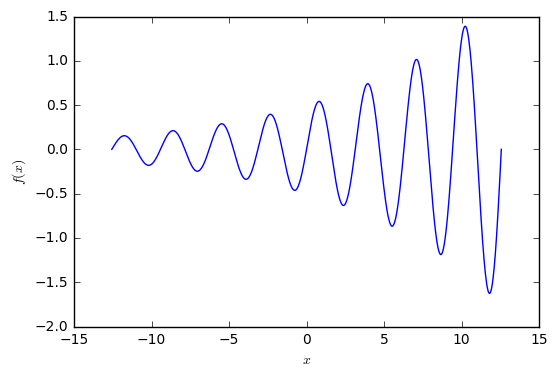

In [2]:
# Part IA Computing: Michaelmas Term
# Edwin Bahrami Balani (eb677@cam.ac.uk)

# Exercise 08.1 - part 1 (no interactivity)

from numpy import sin, cos, pi, exp

ω0 = 1
ω1 = 1

f = lambda x: exp(x/10) * sin(ω1*x) * cos(ω0*x)

x = np.linspace(-4*pi, 4*pi, num=1000)
y = f(x)

plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

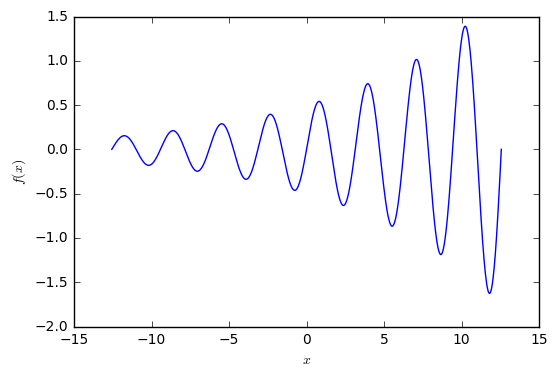

In [3]:
# Part IA Computing: Michaelmas Term
# Edwin Bahrami Balani (eb677@cam.ac.uk)

# Exercise 08.1 - part 2 (interactive sliders)

from numpy import sin, cos, pi, exp
from ipywidgets import interact

ω0 = 1
ω1 = 1

f = lambda x: exp(x/10) * sin(ω1*x) * cos(ω0*x)

x = np.linspace(-4*pi, 4*pi, num=1000)
y = f(x)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

@interact(ω0 = (0, 2, 0.01), ω1 = (0, 2, 0.01))
def plotfunc(ω0 = 1, ω1 = 1):
    f = lambda x: exp(x/10) * sin(ω1*x) * cos(ω0*x)
    y = f(x)
    plt.plot(x, y)


> ## Exercise 08.2 (multiple function plotting)
> 
> 1. Plot the function 
> 
>    $$
     f(x)  = \frac{\sin(x)}{x}
     $$
> 
>    from $x = -6\pi$ to $x = 6\pi$. Think carefully about which $x$ values you use when 
>    $x$ is close to zero.
>   
> 1. Add to the above plot the graph of $1/ \left| x \right|$, and limit the range of the $y$ axis to 1 using
>    `plt.ylim`. (Hint: use `np.abs(x)` to return the absolute values of each 
>    component of a NumPy array `x`. 

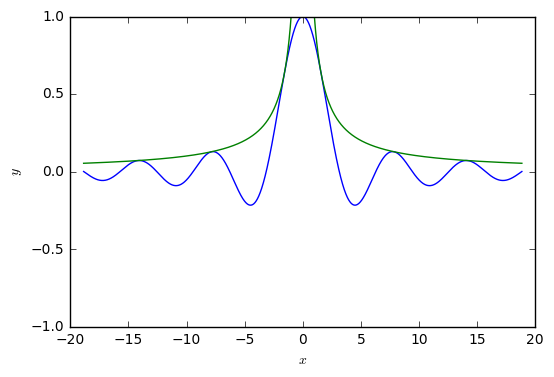

In [4]:
# Part IA Computing: Michaelmas Term
# Edwin Bahrami Balani (eb677@cam.ac.uk)

# Exercise 08.2
from numpy import sin, pi, abs

f = lambda x: sin(x)/x

x = np.linspace(-6*pi, 6*pi, num=5000)

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.plot(x, f(x))

g = lambda x: 1/abs(x)
plt.ylim(-1, 1)
plt.plot(x, g(x))

> ## Exercise 08.3 (demographics and interactive plotting)
> 
> A county planning body has requested an interactive tool to visualise the population distribution in Cambridgeshire (by district) from 2011 to 2021 for different population growth rate scenarios in each district. It can be assumed that:
> 
> - the growth rates are constant in each district;
> - the growth rate will not be negative in any district; and 
> - the annual growth rate in any one district will not exceed 10%.
> 
> Building on the pie chart example with population data in the body of the notebook, create an interactive plot with:
> 
> 1. A slider for the year (from 2011 to 2021); and
> 2. Sliders for the annual population growth for each district (in percentage), with an 
>    initial value of zero for each district.

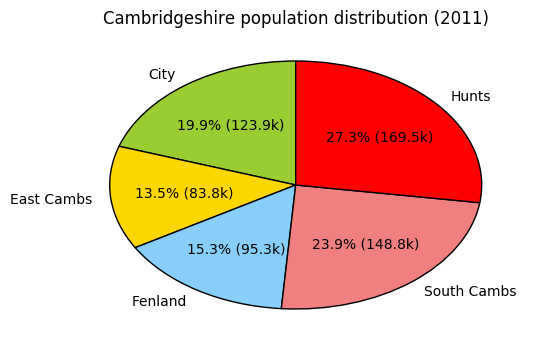

In [14]:
# Part IA Computing: Michaelmas Term
# Edwin Bahrami Balani (eb677@cam.ac.uk)

# Exercise 08.3
from ipywidgets import interact, HBox, Label, IntSlider

district = ('City', 'East Cambs', 'Fenland', 'Hunts',
            'South Cambs')
population = (123900, 83800, 95300, 169500, 148800)
start_year = 2011
starting_pops = dict(zip(district, population))

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']

slider_dict = {x: ipywidgets.FloatSlider(min=0.0, max=10.0, step=0.1,
                                         value=0.0, continuous_update=False)
               for x in district}

# Taken and adapted from http://stackoverflow.com/a/6170354
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}% ({v:1.1f}k)'.format(p=pct,v=val/1000)
    return my_autopct


@interact(current_year = IntSlider(min=2011, max=2021, step=1, 
                                   value=2011, description='Current year'),
          **slider_dict)
def dopie(current_year, **kwargs):
    growthrates = {i: kwargs[i]/100 for i in kwargs}
    yeardifference = current_year - start_year
    
    current_pops = {k: starting_pops[k] * (1+growthrates[k])**yeardifference for k in starting_pops}
    # Produce pie chart. The slices will be ordered and plotted counter-clockwise.
    values = list(current_pops.values())
    keys = current_pops.keys()
    plt.pie(values, labels=keys, colors=colors,
            autopct=make_autopct(values), startangle=90)

    # Add title
    plt.title("Cambridgeshire population distribution ({})".format(current_year))

> ## Exercise 08.4 (crime reports by location)
> 
> 
> ### Background
> 
> Your task is to produce a crime report data plot in the neighborhood of your college, by reported crime
> category. It will be interesting to see how this varies between colleges!
> 
> We can get crime data in the UK from the police data systems using what is known as a REST API,
> and turn the data into a list of Python dictionaries. Each entry in the list is a police report 
> (an entry is a Python dictionary detailing the report).
> 
> The first step is the import the modules we will be using:

In [6]:
import json
import requests

> The service https://data.police.uk has an interface where we can add specific strings to the URL (web address) to define what data we are intersted in, and the police server will return our requested data. The format is
> 
>     https://data.police.uk/api/crimes-street/all-crime?poly=[LAT0],[LON0]:[LAT1],[LON1]:[LAT2,LON2]&date=YYYY-MM
>     
> This return crimes reports in the triangle given by the three geographic coordinate points `(latitude0, longitude0), (latitude1, longitude1) and (latitude2, longitude2)`, for the month `YYY-MM`.          
> 
> Below we create this URL string to include a large part of the Cambridge city centre. You can modify this for your own college or other area of interest (Google Maps is a handy way to get the geographic coordinates).

In [7]:
# A triangle that includes most of the Cambridge city centre
# (long, lat) for three vertices of a triangle (no spaces!)
p0 = '52.211546,0.116465'
p1 = '52.203510,0.145500'
p2 = '52.189730,0.113050'

# year-month of interest
year_month = '2016-05'

# Construct request URL string using the above data
url = 'https://data.police.uk/api/crimes-street/all-crime?poly=' + p0 + ':' + p1 + ':' + p2 + '&date=' + year_month

# Fetch data from https://data.police.uk
r = requests.get(url)

> The following converts the fetched data into a list of dictionaries:

In [8]:
crime_data = r.json()

> To get an idea of how the data is arranged, we can look at the first report in the list. To make the displayed data easier to read, we use the 'pretty print' module `pprint`.

In [9]:
import pprint
if crime_data:
    pprint.pprint(crime_data[0])

{'category': 'anti-social-behaviour',
 'context': '',
 'id': 48720445,
 'location': {'latitude': '52.201521',
              'longitude': '0.131946',
              'street': {'id': 560678, 'name': 'On or near Mortimer Road'}},
 'location_subtype': '',
 'location_type': 'Force',
 'month': '2016-05',
 'outcome_status': None,
 'persistent_id': ''}


> ### Task
> 
> 
> Produce a bar chart of the number of reports in different categories. The categories are: 

In [10]:
categories = ('anti-social-behaviour', 'bicycle-theft', 'burglary', 'criminal-damage-arson', \
              'drugs', 'other-crime', 'other-theft', 'public-order', 'shoplifting', \
              'theft-from-the-person', 'vehicle-crime', 'violent-crime')

> Run your program for different parts of Cambridge, starting with the area around your college, and for different months and years.
> 
> #### Hints:
> 
> Create an empty dictionary, which will eventually map the report category to the number of incidents:

In [11]:
categories_freq = {}

> Iterate over all reports in the list, and extract the category string from each report. If the category string (the 'key') is already in the dictionary increment the associated counter. Otherwise add the key to the dictionary, and associate the value 1.

In [12]:
# Iterate over all reports
for report in crime_data:
    # Get category type from the report
    category = report['category']
    
    if category in categories_freq:
        # Increment counter here
        pass  # This can be removed once this 'if' block has a body
    else:
        # Add category to dictionary here
        pass  # This can be removed once this 'else' block has a body

> When adding the tick labels (crime categories), it may be necessary to rotate the labels, e.g.:
> ```python
plt.xticks(x_pos, categories, rotation='vertical')
```

<Container object of 14 artists>

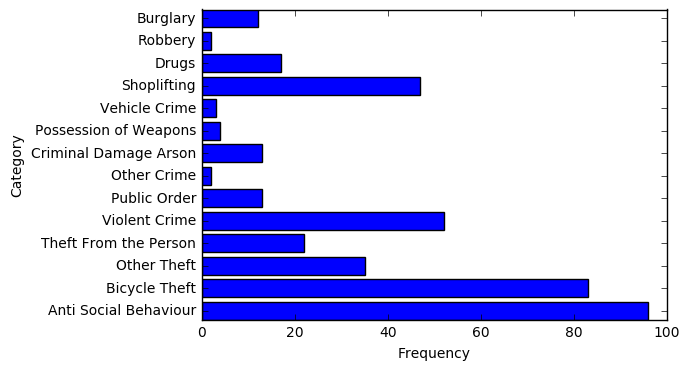

In [13]:
# Part IA Computing: Michaelmas Term
# Edwin Bahrami Balani (eb677@cam.ac.uk)

# Exercise 08.4
# Iterate over all reports
for report in crime_data:
    # Get category type from the report
    category = report['category']
    
    if category in categories_freq:
        categories_freq[category] += 1
    else:
        categories_freq[category] = 1

def prettylabel(input, sep='-'):
    # from http://grammar.yourdictionary.com/capitalization/rules-for-capitalization-in-titles.html
    noncapwords = ['a', 'an', 'the', 'at', 'by', 'for', 'in', 'of',
                   'on', 'to', 'up', 'and', 'as', 'but', 'or', 'nor']
    return ' '.join([(i.capitalize() if not i in noncapwords else i) for i in input.split(sep)])

categories = [prettylabel(i,sep='-') for i in categories_freq.keys()]
counts = list(categories_freq.values())

y_pos = np.arange(len(categories))
plt.yticks(y_pos+0.4, categories)
plt.ylabel('Category')
plt.xlabel('Frequency')
plt.barh(y_pos, counts)

### Extensions (optional)

1. Probe the retrieved data to build a set of all crime categories in the data set.
2. Explore the temporal (time) aspect of the data. Thinks of ways to represent the change in reported incident 
   types over time.